In [1]:
#IMPORT THE LIBRARIES 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
 the files in the input directory

import os
print(os.listdir("../input"))

['cell_images']


In [2]:
#WE HAVE IMAGE DATA  IN TWO SEPERATE FOLDERS
parasitized_data = os.listdir('../input/cell_images/cell_images/Parasitized/')
uninfected_data = os.listdir('../input/cell_images/cell_images/Uninfected/')

In [3]:
len(parasitized_data),len(uninfected_data)

(13780, 13780)

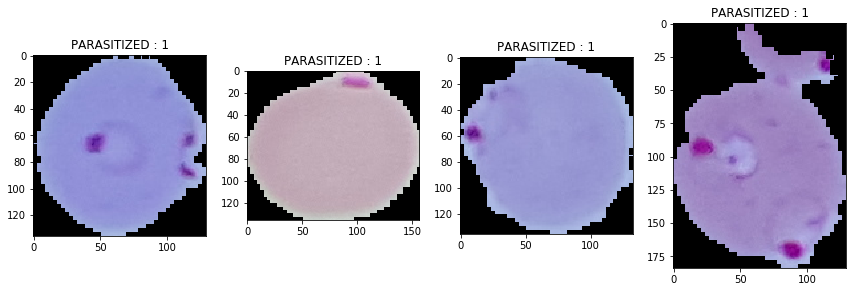

In [4]:
#VISUALIZE THE DATA,IT IS DIFFERENT WITH IMAGE DATA
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [5]:
#IMPORT KERAS LIBRARIES
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
classifier=Sequential()

In [7]:
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
#USED RELU AS AN ACTIVATION FUNCTION IN INPUT LAYER

Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [8]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
classifier.add(Flatten())

In [10]:
classifier.add(Dense(output_dim=128,activation='relu'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.


In [11]:
classifier.add(Dense(output_dim=1,activation='sigmoid'))
#USED SIGMOID FUNCTION IN OUTPUT LAYER

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [12]:
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

In [15]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
training_set = train_datagen.flow_from_directory(
        '../input/cell_images/cell_images',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
validation_set = test_datagen.flow_from_directory(
        '../input/cell_images/cell_images',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifier.fit_generator(
        training_set,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_set,
        validation_steps=5)

Found 27558 images belonging to 2 classes.
Found 27558 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
100/100 [==============================] - 20s 196ms/step - loss: 0.7072 - acc: 0.6078 - val_loss: 0.6452 - val_acc: 0.5938
Epoch 2/3
100/100 [==============================] - 17s 174ms/step - loss: 0.6355 - acc: 0.6353 - val_loss: 0.6183 - val_acc: 0.6813
Epoch 3/3
100/100 [==============================] - 19s 194ms/step - loss: 0.5912 - acc: 0.6891 - val_loss: 0.5151 - val_acc: 0.7438


In [ ]:
#USED JUST 3 EPOCHS TO KEEP IT SHORT,ACCURACY WILL BE HIGHER WITH MORE EPOCHS